<a href="https://colab.research.google.com/github/gayathri2510/aquap/blob/master/Copy_of_Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df=df.replace(to_replace="3+",value=4)

In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
 df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df1["Gender"]=le.fit_transform(df1["Gender"])
df1["Married"]=le.fit_transform(df1["Married"])
df1["Education"]=le.fit_transform(df1["Education"])
df1["Self_Employed"]=le.fit_transform(df1["Self_Employed"])
df1["Property_Area"]=le.fit_transform(df1["Property_Area"])


<ipython-input-16-feecc44ce678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gender"]=le.fit_transform(df1["Gender"])
<ipython-input-16-feecc44ce678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Married"]=le.fit_transform(df1["Married"])
<ipython-input-16-feecc44ce678>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
df1["Loan_Status"]=le.fit_transform(df1["Loan_Status"])

<ipython-input-17-999e0f30f2c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Loan_Status"]=le.fit_transform(df1["Loan_Status"])


In [ ]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
corr=df1.corr()

<ipython-input-19-fa62c0265c31>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df1.corr()


In [ ]:
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


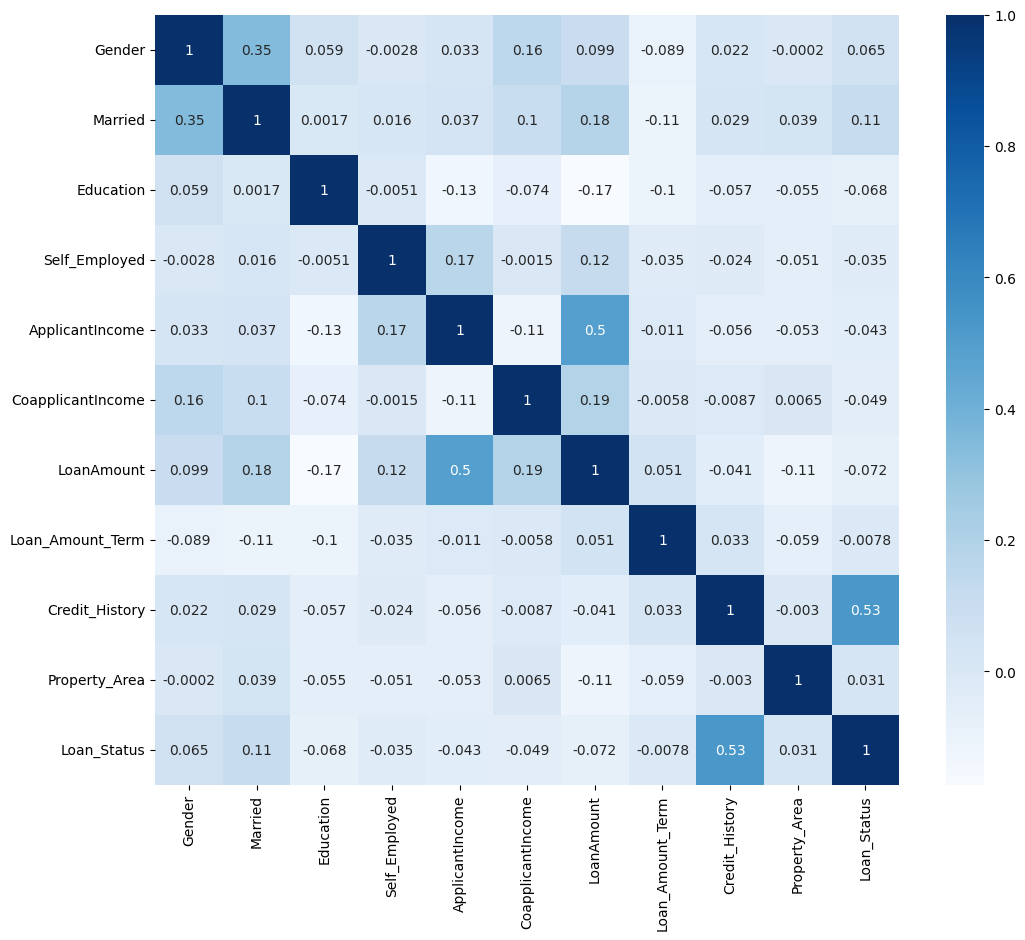

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sea
sea.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df1=df1.drop(["Property_Area"],axis=1)

In [ ]:
df1.shape

(480, 12)

In [ ]:
corr1=df1.corr()

<ipython-input-24-2a9953ffd3ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=df1.corr()


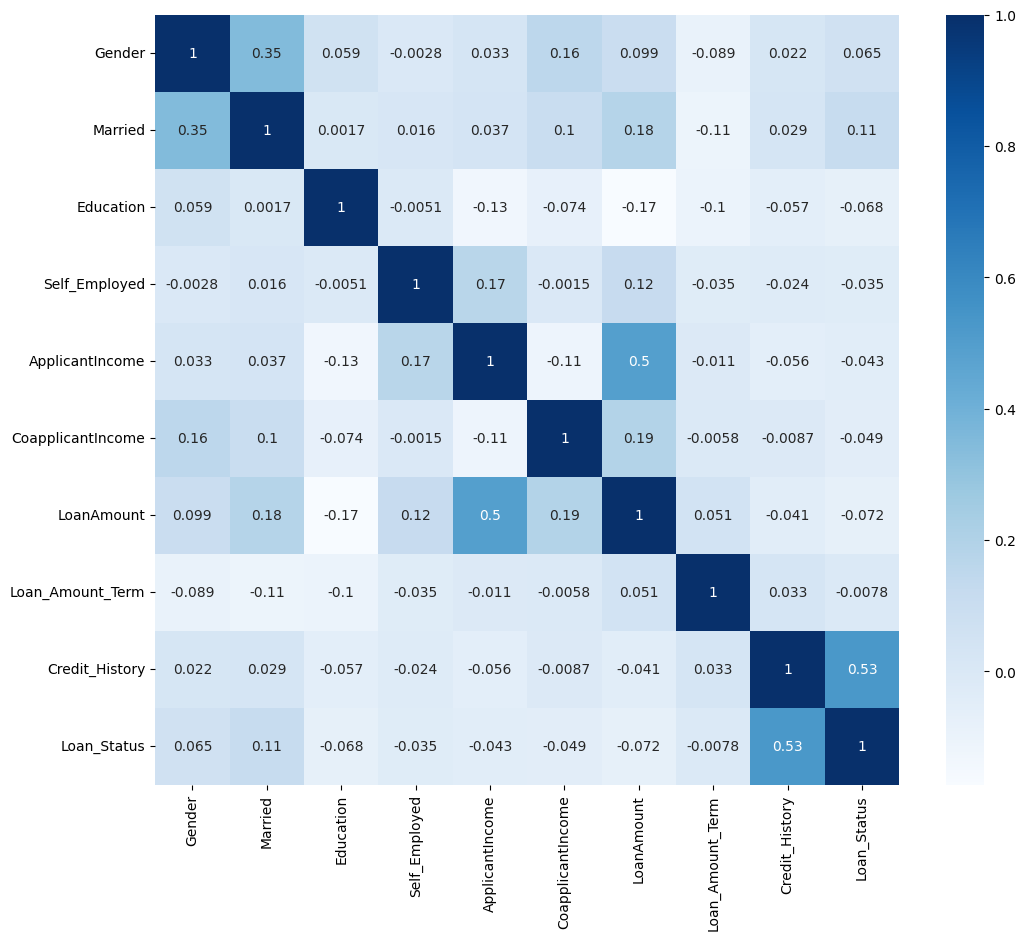

In [ ]:
plt.figure(figsize=(12,10))
sea.heatmap(corr1, annot=True, cmap=plt.cm.Blues)
plt.show()

<Axes: xlabel='Education', ylabel='count'>

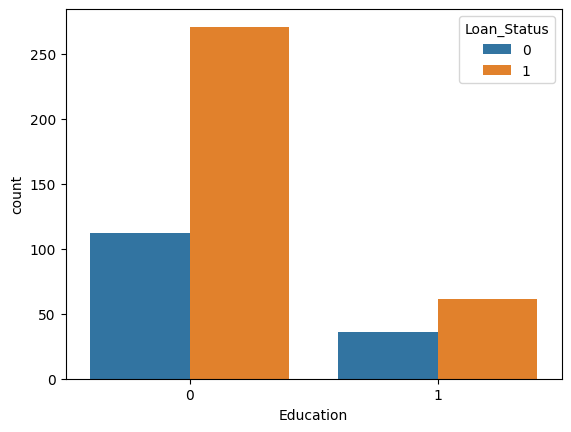

In [ ]:
sea.countplot(x="Education",hue="Loan_Status",data=df1)

<Axes: xlabel='Loan_Status,Married'>

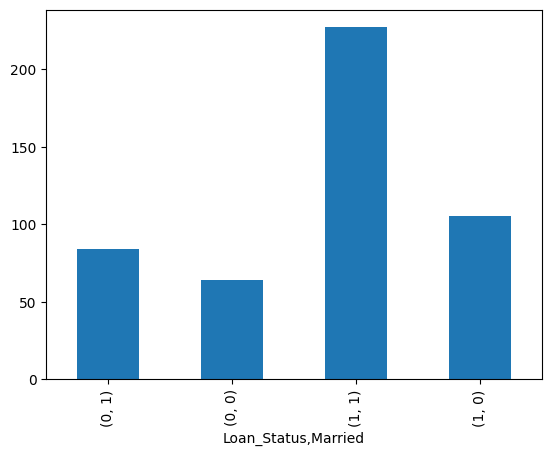

In [ ]:
df1["Married"].groupby(df1["Loan_Status"]).value_counts().plot(kind="bar")

In [ ]:
x=df1.drop(["Loan_Status"],axis=1)
y=df1["Loan_Status"]

In [ ]:
x=df1.drop(["Loan_ID"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train,x_test,y_train,y_test


(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 98        1        1          0          1              0             4188   
 306       0        0          0          0              0             3762   
 523       1        1          2          0              1             7948   
 521       1        0          0          0              0             2500   
 211       1        1          4          0              0             3430   
 ..      ...      ...        ...        ...            ...              ...   
 326       1        0          0          0              0             4917   
 91        1        1          2          0              0             6250   
 509       0        0          1          0              0            13262   
 297       0        1          1          0              0             4666   
 50        0        1          0          1              0             1928   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [ ]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
98,1,1,0,1,0,4188,0.0,115.0,180.0,1.0,1
306,0,0,0,0,0,3762,1666.0,135.0,360.0,1.0,1
523,1,1,2,0,1,7948,7166.0,480.0,360.0,1.0,1
521,1,0,0,0,0,2500,0.0,55.0,360.0,1.0,1
211,1,1,4,0,0,3430,1250.0,128.0,360.0,0.0,0


In [ ]:
from sklearn import svm

In [ ]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_pred=model.predict(x_train)


In [ ]:
from sklearn.metrics import accuracy_score
training_data_acc=accuracy_score(x_train_pred,y_train)

In [ ]:
print("Accuracy on training data:",training_data_acc)

Accuracy on training data: 0.9713541666666666


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
test_data_acc=accuracy_score(y_pred,y_test)

In [ ]:
print("Accuracy on testing data",test_data_acc)

Accuracy on testing data 0.9166666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[27,  6],
       [ 2, 61]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.91      0.97      0.94        63

    accuracy                           0.92        96
   macro avg       0.92      0.89      0.90        96
weighted avg       0.92      0.92      0.92        96

